In [1]:
import re
import nltk
!pip install spacy
!pip install gensim
import spacy
import warnings
import nltk.data
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gensim.utils import simple_preprocess
from gensim.models import word2vec, KeyedVectors
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
orange, purple, elm, grey ='#FFCC00', '#666599', '#217C7E', '#F5F5F5'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
database = pd.read_csv('/content/complete_data.csv',index_col=0,lineterminator='\n')
data_aa = database[database['race']=='black']
data_wa = database[database['race']=='white']
database

,ID,body,author,submission,race
0,goxcd0b,The state of Georgia did just launch a new web...,atlblaze,lsv12l,black
1,gov1kmv,The Atlanta Entertainment Commission that was ...,dustyfetus,lt083k,NaN
2,gotjden,Have definitely had this conversation with my ...,Mario_Speedwagon,lscc0x,white
3,gorckwr,I always called that one Unpredictable Kroger....,BootySniffer26,lscc0x,NaN
4,gopawta,"Don't worry, everyone who lives there already ...",ricorgbldr,ls5q3l,NaN
...,...,...,...,...,...
23352,c09hldb,I live in Decatur (walking distance to Decatur...,corkill,8jf09,NaN
23353,c097u6y,One thing you need to consider here is your un...,Uberg33k,8glmo,NaN
23354,c08wbkw,East Atlanta has a few great places\r\n\r\nGra...,bunnyfart,7snmk,NaN
23355,c07ij2v,I live a couple of blocks from Piedmont Park. ...,thedeevolution,6nwmw,NaN


# Individual-level frequently mentioned words

In [3]:
def clean_stem(text, join=0):

    no_cite = re.sub('>.*','',text)

    no_url = re.sub(r"http\S+", '', no_cite)

    review_text = BeautifulSoup(no_url).get_text()

    doc = nlp(review_text)
    
    #Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #Convert to lower case and split
    words = letters_only.lower().split()
    
    #Covert stop words to a set
    stops = set(stopwords.words("english"))
    
    #Remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    results = []
    for i in meaningful_words:
        if len(i) > 3:
            stemmed_token = lemmatize_stemming(i)
            stemmed_to_original[stemmed_token] = i
            results.append(stemmed_token)

    return results

In [4]:
stemmer = SnowballStemmer("english")
stemmed_to_original = {}

## Basic Preprocessings Functions ##
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def find_keywords(corpus):

    news_data = []
    for i in tqdm_notebook(corpus):
        news_data.append(clean_stem(i))
    ## notice, min_df and max_df parameters are really important in getting the most important keywords out of your corpus
    vectorizer = TfidfVectorizer(min_df = 20 , max_df = 0.72, tokenizer= lambda x : x , lowercase= False)
    vectorizer.fit_transform(news_data)

    ## get idf values of all the corresponding tokens used by vectorizer and sort them in ascending order
    word_to_idf = {i:j for i,j in zip(vectorizer.get_feature_names() , vectorizer.idf_ )}
    ## sort the dictionairy in ascending order of idf weights
    word_to_idf = sorted(word_to_idf.items() ,key = lambda x : x[1],  reverse = False)

    return word_to_idf

In [5]:
print('for all authors data')
comments = list(database['body'])
all_key = find_keywords(comments)

print('for african american authors data')
comments = list(data_aa['body'])
black_key = find_keywords(comments)

print('for white american authors data')
comments = list(data_wa['body'])
white_key = find_keywords(comments)

for all authors data



for african american authors data



for white american authors data


In [6]:
for k,v in all_key[:200]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

like ---> 2.0608053666377946
atlanta ---> 2.1986213925057303
people ---> 2.213205580085237
work ---> 2.2759117994453084
area ---> 2.313888079436612
would ---> 2.3620174234484788
place ---> 2.4423805345544665
city ---> 2.454223617315213
want ---> 2.531353294370458
going ---> 2.6266238788391085
also ---> 2.669562295489791
time ---> 2.6743475387557023
makes ---> 2.7504957536320633
parking ---> 2.7648952079916924
looks ---> 2.777983741175664
think ---> 2.779758814546531
really ---> 2.789962984720773
years ---> 2.7938165540367628
knew ---> 2.813835420927255
good ---> 2.8472119003934453
take ---> 2.8518383884388605
around ---> 2.853749651819304
much ---> 2.941382355236537
move ---> 2.9482675792634856
housing ---> 3.009267759727817
even ---> 3.023415905693844
things ---> 3.034814824103633
right ---> 3.0413873091499295
nearly ---> 3.071170336989744
midtown ---> 3.1099563620249002
drive ---> 3.114557325724398
need ---> 3.114557325724398
find ---> 3.1378851375499104
neighborhoods ---> 3.15030765

In [7]:
for k,v in black_key[:200]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

people ---> 2.027452569096068
atlanta ---> 2.0835420357471115
like ---> 2.1361857692325334
work ---> 2.2735856386349766
would ---> 2.3627134185309835
city ---> 2.4986690547670127
want ---> 2.518277526155389
area ---> 2.538278192862059
makes ---> 2.5586870644932658
place ---> 2.6007985498433923
years ---> 2.751371408322767
time ---> 2.7895926211429645
also ---> 2.8026647027103175
going ---> 2.8026647027103175
think ---> 2.815909929460338
good ---> 2.829332949792479
move ---> 2.899291538399389
housing ---> 2.9138903378205416
take ---> 2.9138903378205416
parking ---> 2.943743300970223
right ---> 2.943743300970223
around ---> 2.9590107731010113
knew ---> 2.9590107731010113
even ---> 2.9745149596369767
looks ---> 2.9745149596369767
really ---> 2.9745149596369767
things ---> 2.9745149596369767
nearly ---> 3.072955032450229
need ---> 3.0903467751620983
much ---> 3.1080463522614994
marta ---> 3.144413996432374
midtown ---> 3.144413996432374
pretty ---> 3.144413996432374
find ---> 3.16310612944

In [8]:
for k,v in white_key[:200]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

like ---> 1.965492029544424
people ---> 2.122236744548729
work ---> 2.2411567899921874
atlanta ---> 2.2502997108248617
area ---> 2.3709571376525886
would ---> 2.3826836563929077
place ---> 2.4296406394806787
city ---> 2.440690475667264
going ---> 2.480355732059695
want ---> 2.5460509913250897
makes ---> 2.629701020612015
time ---> 2.631380282131735
think ---> 2.711843246167834
years ---> 2.720992440821422
knew ---> 2.750845403971103
also ---> 2.7565434250857406
take ---> 2.7973654196059963
good ---> 2.823497559882844
even ---> 2.8482410902664492
really ---> 2.8736124300084676
looks ---> 2.8779042820900083
parking ---> 2.8930725035631797
around ---> 2.9354422746021935
housing ---> 2.9538335975736167
move ---> 2.9538335975736167
much ---> 2.967852518752948
things ---> 2.974936373641353
nearly ---> 3.0111285022347696
right ---> 3.061516994647583
need ---> 3.093015661706954
neighborhoods ---> 3.1037396250699296
could ---> 3.1064386820390943
drive ---> 3.1118587495084338
home ---> 3.1366192

In [9]:
transportaion = [3.114557325724398, 3.2183818335183467]
facilities = [3.8870379940699964, 3.9694516618109965]
neighbor = [3.150307657548468, 3.4918663376301797]

transportaion_black = [3.144413996432374, 3.3267355532263285]
facilities_black = [3.8375611769923195, 3.955344212648703]
neighbor_black = [3.201572410272323, 3.955344212648703]

transportaion_white = [3.1118587495084338, 3.319498114286678]
facilities_white = [3.849457692639213, 4.015995381731905]
neighbor_white = [3.1037396250699296, 3.4364453788956655]

## Visualization

In [10]:
x = np.arange(3)
orange, purple, elm, grey ='#FFCC00', '#666599', '#217C7E', '#F5F5F5'

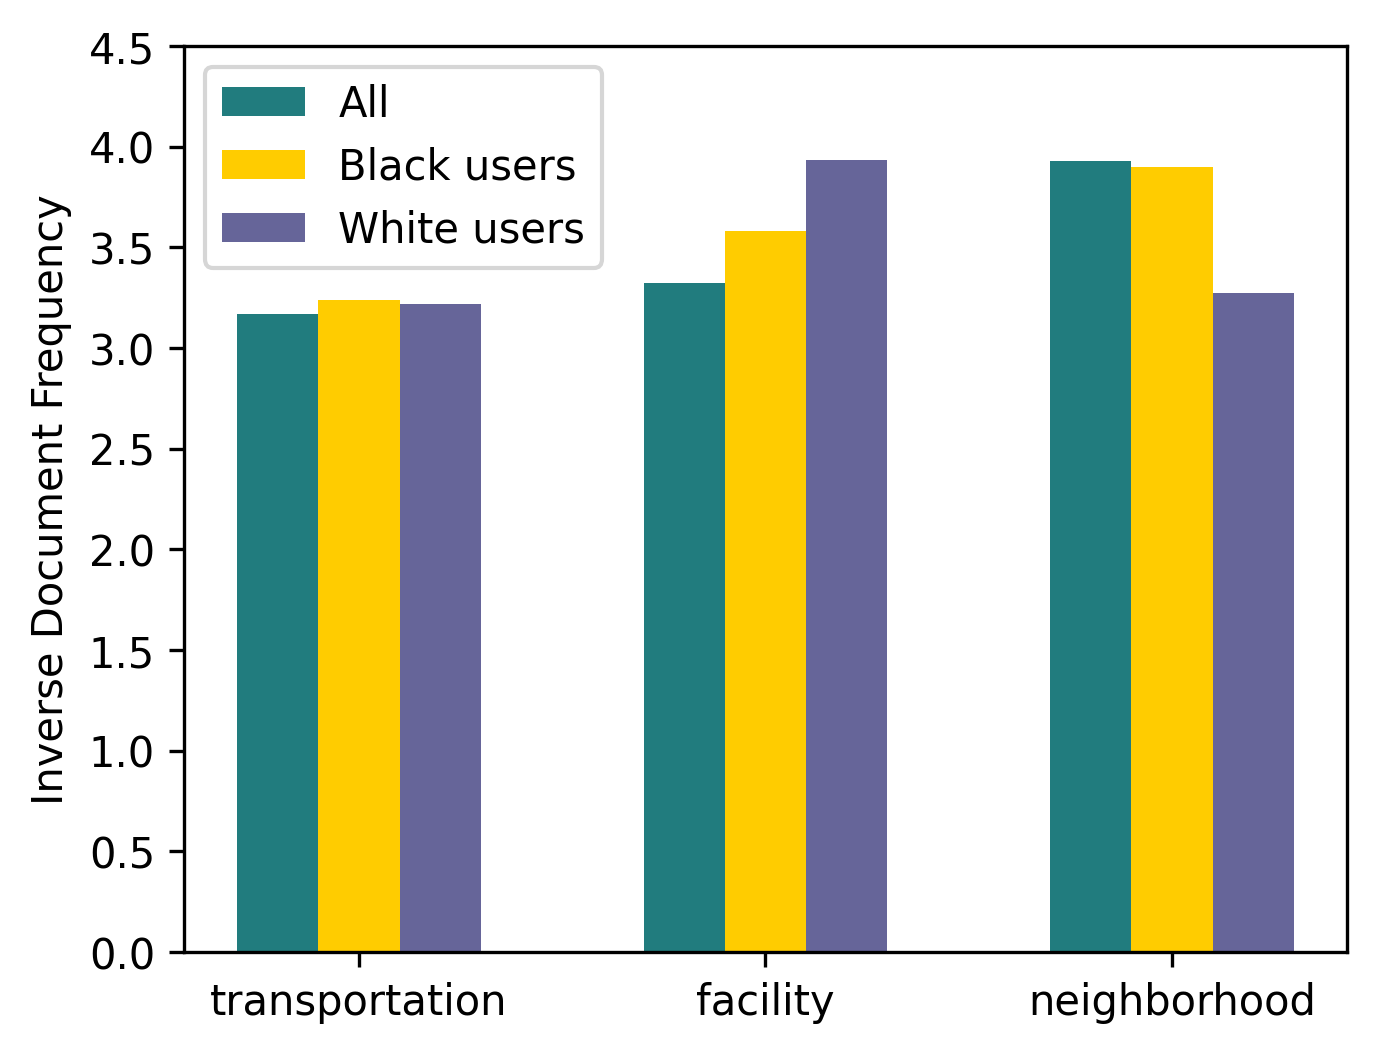

In [11]:
fig, ax = plt.subplots(figsize=(5,4), dpi=300)
plt.bar(x,[np.mean(transportaion),np.mean(neighbor),np.mean(facilities)],
        0.2, color=elm, label='All')
plt.bar(x+0.2,[np.mean(transportaion_black),np.mean(neighbor_black),np.mean(facilities_black)], 
        0.2, color=orange, label='Black users')
plt.bar(x+0.4,[np.mean(transportaion_white),np.mean(facilities_white),np.mean(neighbor_white)],
        0.2, color=purple,label = 'White users')
ax.set_ylim(0,4.5)
ax.set_ylabel('Inverse Document Frequency')
ax.set_xticks(x+0.2)
ax.set_xticklabels(['transportation', 'facility', 'neighborhood'])
plt.legend(loc='best', fontsize=10)
plt.savefig('Attention.jpg')

# Groups of keywords and sentiment

In [12]:
import nltk.data
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from tqdm import tqdm_notebook

! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
def clean(text, join=0):

    no_cite = re.sub('>.*','',text)

    no_url = re.sub(r"http\S+", '', no_cite)

    review_text = BeautifulSoup(no_url).get_text()
    
    #Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #Convert to lower case and split
    words = letters_only.lower().split()
    
    #Covert stop words to a set
    stops = set(stopwords.words("english"))
    
    #Remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    
    #Join the words back into one string separated by space
    clean_text = meaningful_words
    if join:
        clean_text = " ".join(meaningful_words)

    return clean_text

In [14]:
def review_to_sentences(review: str, tokenizer: nltk.tokenize.punkt.PunktSentenceTokenizer):

    raw_sentences = tokenizer.tokenize(review.strip())

    review_sentences = []
    
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call clean_review to get a list of words
            review_sentences.append(clean(raw_sentence))

    return review_sentences

In [15]:
def generate_z1(sentences,num_features,min_word_count,context,num_workers = 4,downsampling = 1e-3, model_name = "model1_100features_40minwords_5context"):

    trained_word2vec_model = word2vec.Word2Vec(sentences, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)
    
    trained_word2vec_model.init_sims(replace=True)

    trained_word2vec_model.save(model_name)

    z1 = trained_word2vec_model.wv.syn0

    word_list_z1 = trained_word2vec_model.wv.index2word

    return trained_word2vec_model, z1, word_list_z1

In [16]:
def fit_kmeans(z,word_list_z,num_clusters = 10):

    kmeans_clustering = KMeans(n_clusters = num_clusters,random_state=3425)

    idx = kmeans_clustering.fit_predict(z)

    word_centroid_map_z = dict(zip(word_list_z, idx))

    return word_centroid_map_z

In [17]:
def print_clusters(word_centroid_map_z):

    clusters_list = {}    
    for cluster in range(0,max(word_centroid_map_z.values())+1):
        print ("\nCluster %d" %cluster)
        words = []
        values = list(word_centroid_map_z.values())
        keys = list(word_centroid_map_z.keys())
        for i in range(0,len(word_centroid_map_z.values())):
            if(values[i] == cluster):
                words.append(keys[i])
        if len(words) > 20:
            out = 20
        else:
            out = len(words)
        print(words[:out])
        clusters_list[cluster]=words
        
    return clusters_list  

In [18]:
sentences = [] 

for review in database['body']:
    sentences += review_to_sentences(review, tokenizer)

In [19]:
num_features = 1000
min_word_count = 40
context = 5

model1, z1, word_list_z1 = generate_z1(sentences,num_features,min_word_count,context)
word_centroid_map_z1 = fit_kmeans(z1, word_list_z1, 10)
clusters = print_clusters(word_centroid_map_z1)


Cluster 0
['house', 'new', 'rent', 'apartment', 'pay', 'month', 'old', 'high', 'k', 'housing', 'kids', 'building', 'family', 'apartments', 'small', 'price', 'property', 'buy', 'market', 'cheap']

Cluster 1
['atlanta', 'many', 'big', 'crime', 'different', 'metro', 'cities', 'seems', 'schools', 'community', 'whole', 'experience', 'world', 'white', 'mostly', 'large', 'folks', 'black', 'major', 'young']

Cluster 2
['money', 'public', 'state', 'problem', 'already', 'real', 'cost', 'making', 'care', 'service', 'system', 'issue', 'huge', 'likely', 'business', 'transportation', 'issues', 'fact', 'plan', 'development']

Cluster 3
['know', 'see', 'someone', 'thing', 'said', 'everyone', 'us', 'help', 'anyone', 'let', 'give', 'person', 'shit', 'kind', 'nothing', 'yes', 'yeah', 'post', 'mean', 'tell']

Cluster 4
['one', 'years', 'home', 'back', 'never', 'every', 'two', 'year', 'got', 'next', 'since', 'maybe', 'first', 'last', 'night', 'come', 'least', 'another', 'times', 'ago']

Cluster 5
['get', 

In [20]:
sentences = database['body']
comments = []
positivity = []
negativity = []
neutrality = []

n = 0
for sentence in tqdm_notebook(sentences):
    n+=1
    no_cite = re.sub('>.*','',sentence)
    no_url = re.sub(r"http\S+", '', no_cite)
    review_text = BeautifulSoup(no_url).get_text()

    vader_score = analyzer.polarity_scores(review_text)
    if vader_score['neg']>0.1 or vader_score['pos']>0.1:
        comments.append(sentence)
        positivity.append(vader_score['pos'])
        negativity.append(vader_score['neg'])
        neutrality.append(vader_score['neu'])

In [21]:
sentiment_database = pd.DataFrame({'body':comments, 'pos':positivity, 
                                   'neg':negativity, 'neu':neutrality})

In [22]:
commute,facility,house,neighbor = [],[],[],[]
com_cluster = clusters[5][:50]
fac_cluster = clusters[7][:50]
hou_cluster = clusters[0][:50]
nei_cluster = clusters[1][:50]

for i in comments:
    num_com,num_fac,num_hou,num_nei = 0,0,0,0
    for c in com_cluster:
        if c in i: 
            num_com+=1
    for f in fac_cluster:
        if f in i: 
            num_fac+=1
    for h in hou_cluster:
        if h in i: 
            num_hou+=1
    for n in nei_cluster:
        if n in i: 
            num_nei+=1

    commute.append(num_com)
    facility.append(num_fac)
    house.append(num_hou)
    neighbor.append(num_nei)

In [23]:
commute = np.array(commute)/max(commute)
facility = np.array(facility)/max(facility)
house = np.array(house)/max(house)
neighbor = np.array(neighbor)/max(neighbor)

In [24]:
sentiment_database['com']=commute
sentiment_database['fac']=facility
sentiment_database['hou']=house
sentiment_database['nei']=neighbor

## Visualization

In [25]:
metrics = [commute, facility, house, neighbor]
metric_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    name = metric_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for value in unique_value:
        dict_data[value]=np.mean(sentiment_database[sentiment_database[name]==value]['pos'])
    metrics_dict.append(dict_data)    

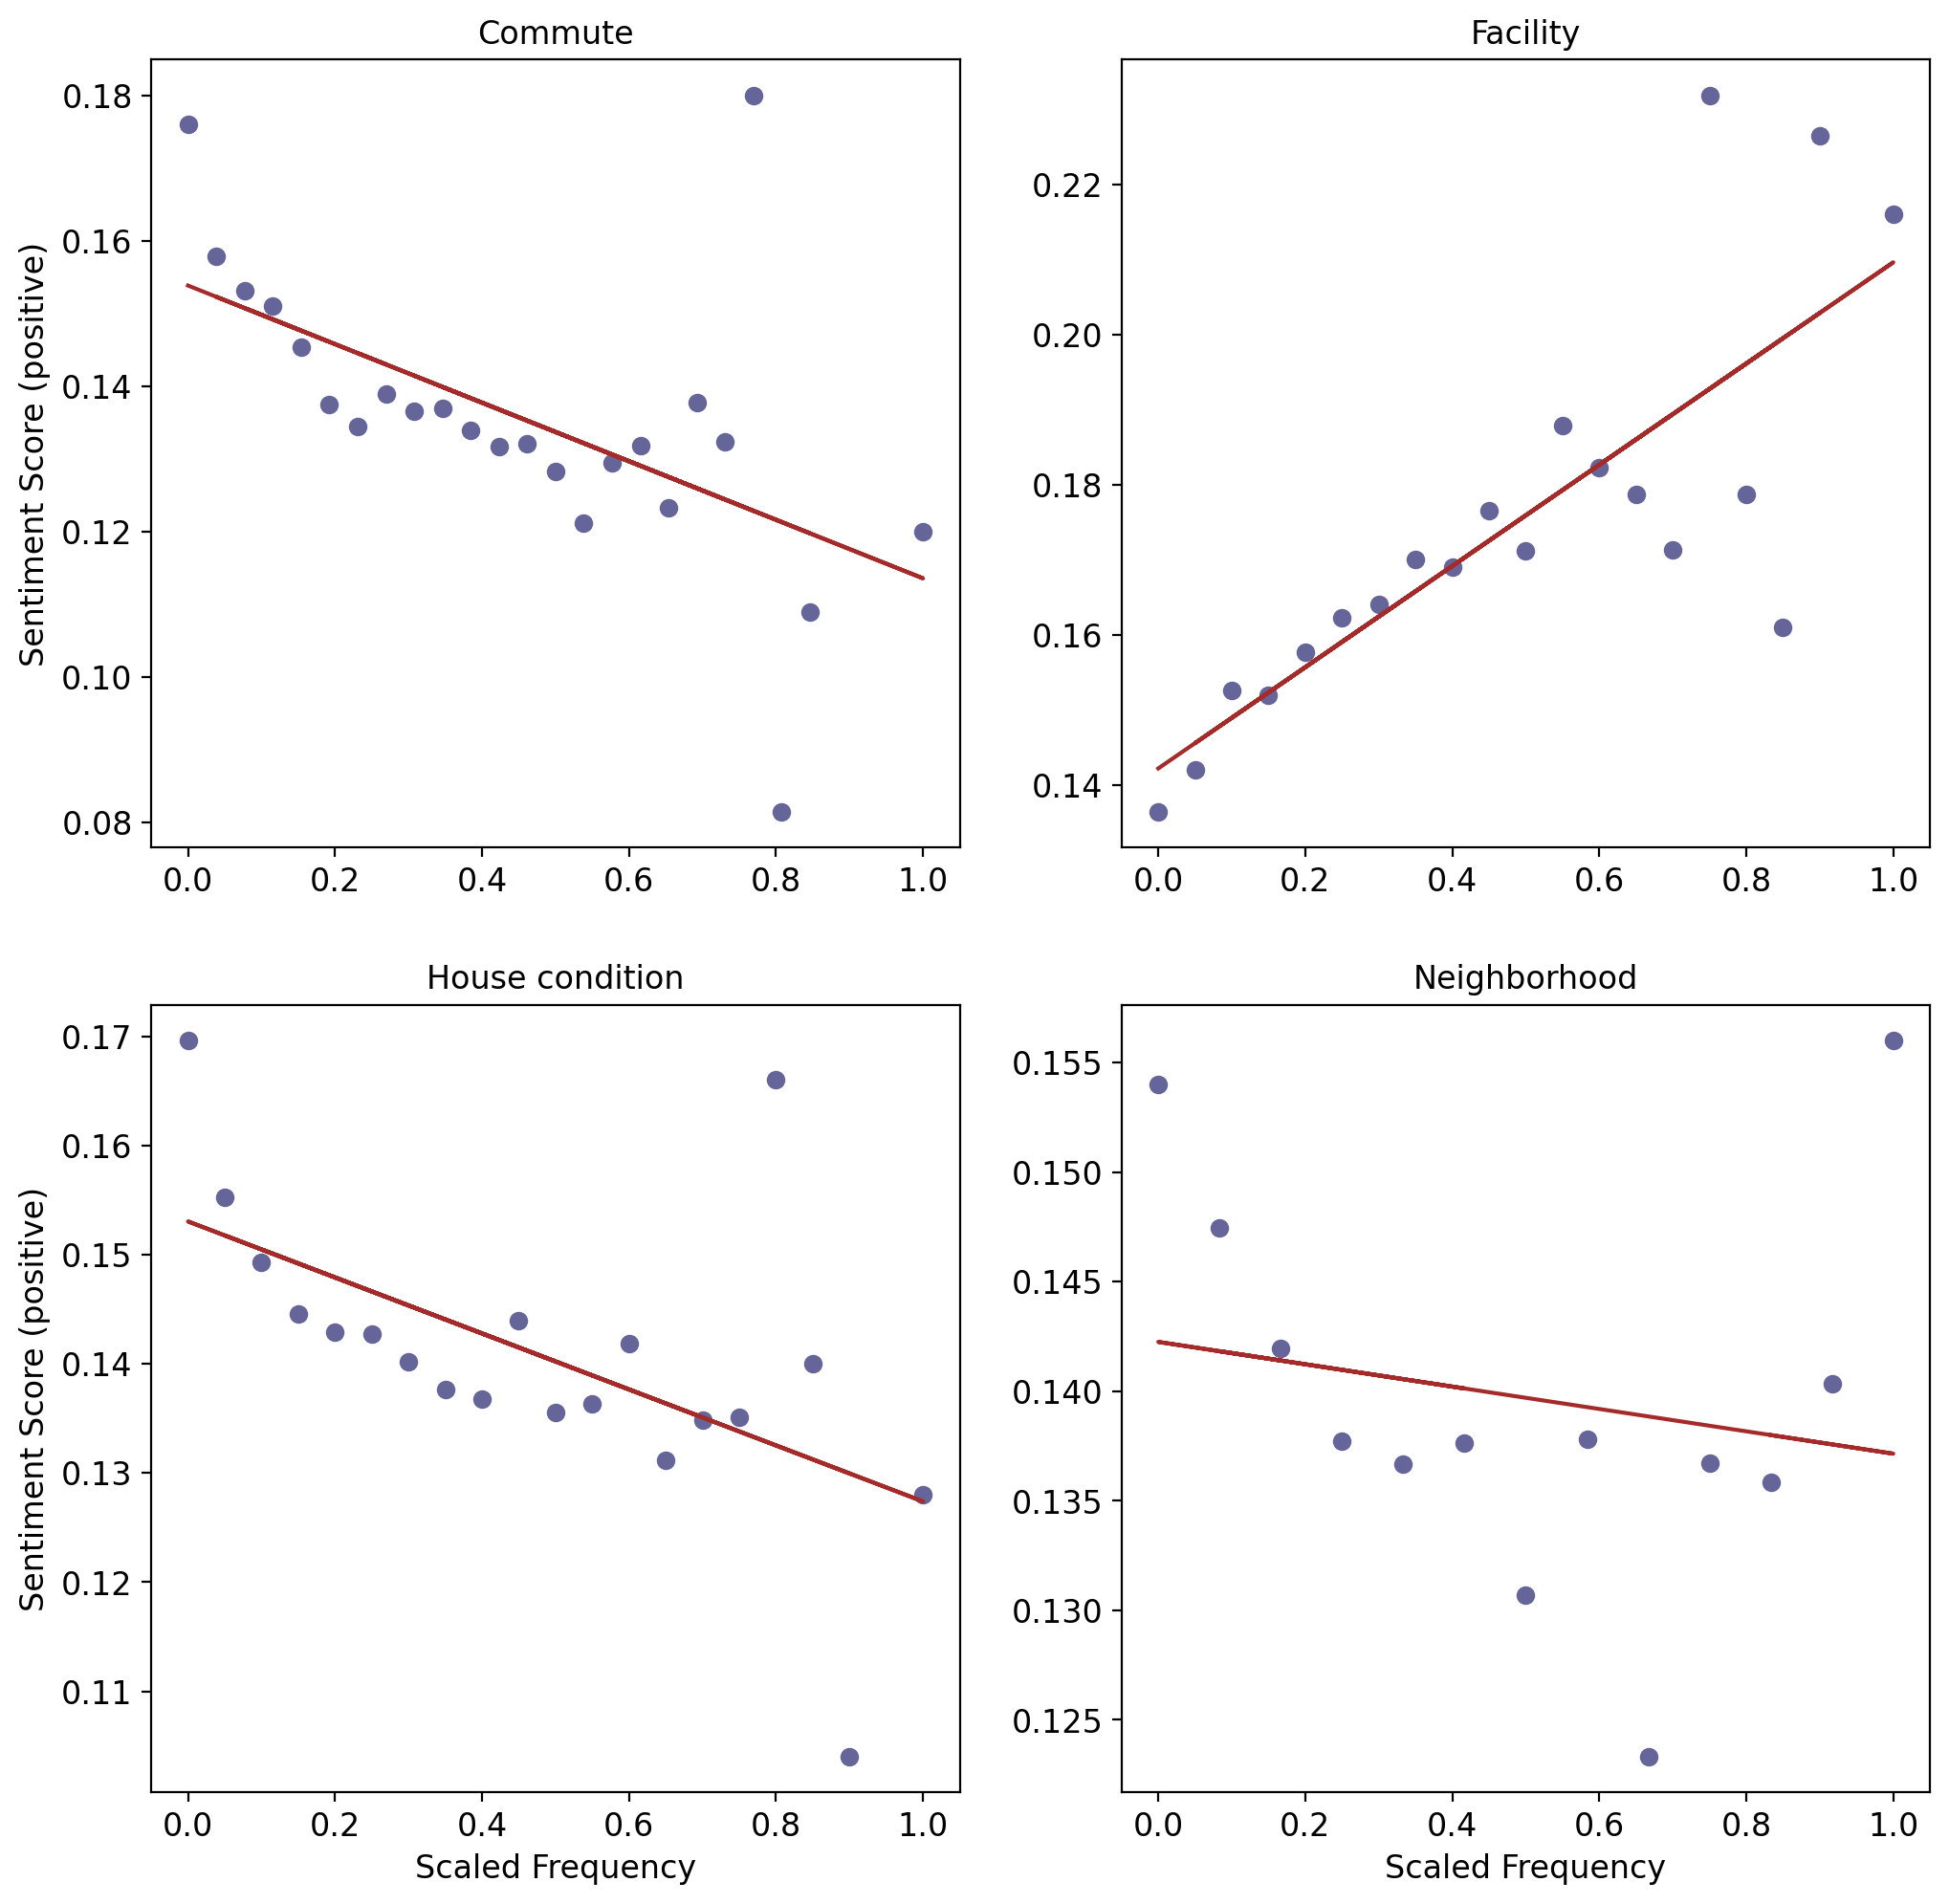

In [26]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=purple)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c='brown')
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (positive)',size=12)
plt.savefig('pos.jpg')

In [27]:
metrics = [commute, facility, house, neighbor]
met_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    mn = met_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for v in unique_value:
        dict_data[v]=np.mean(sentiment_database[sentiment_database[mn]==v]['neg'])
    metrics_dict.append(dict_data)    

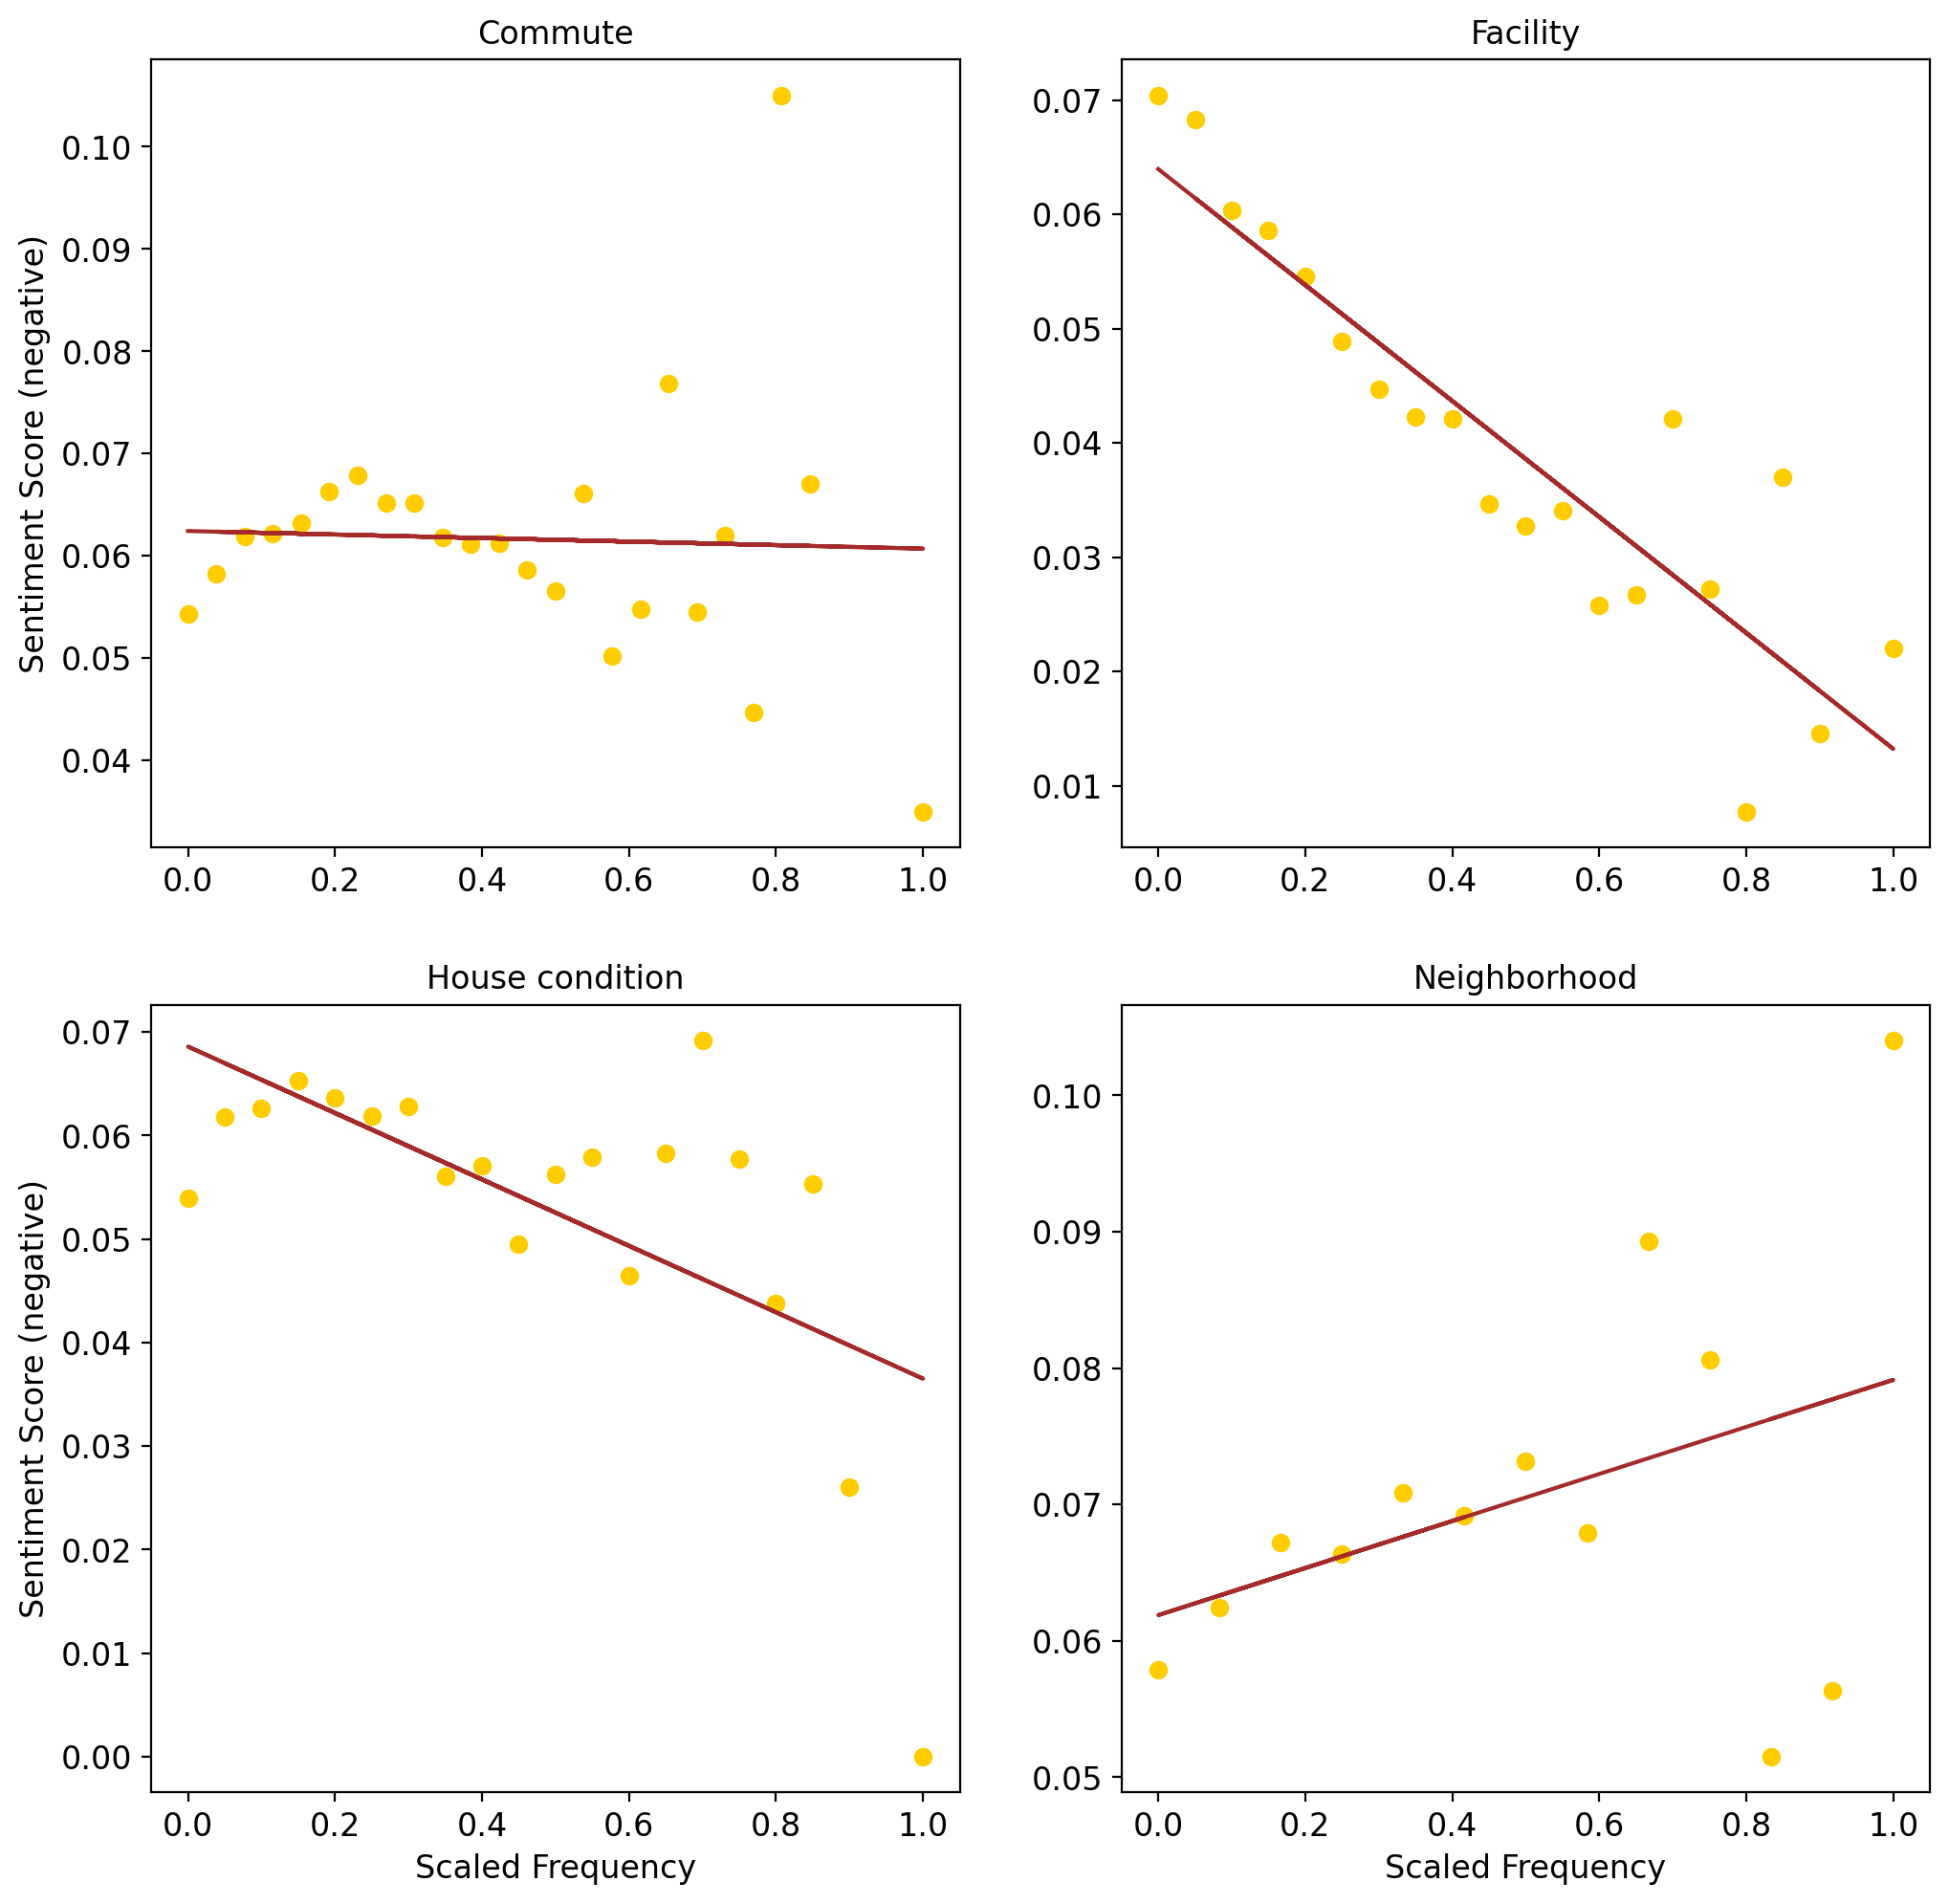

In [28]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=orange)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c='brown')
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (negative)',size=12)
plt.savefig('neg.jpg')

In [29]:
metrics = [commute, facility, house, neighbor]
met_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    mn = met_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for v in unique_value:
        dict_data[v]=np.mean(sentiment_database[sentiment_database[mn]==v]['neu'])
    metrics_dict.append(dict_data)    

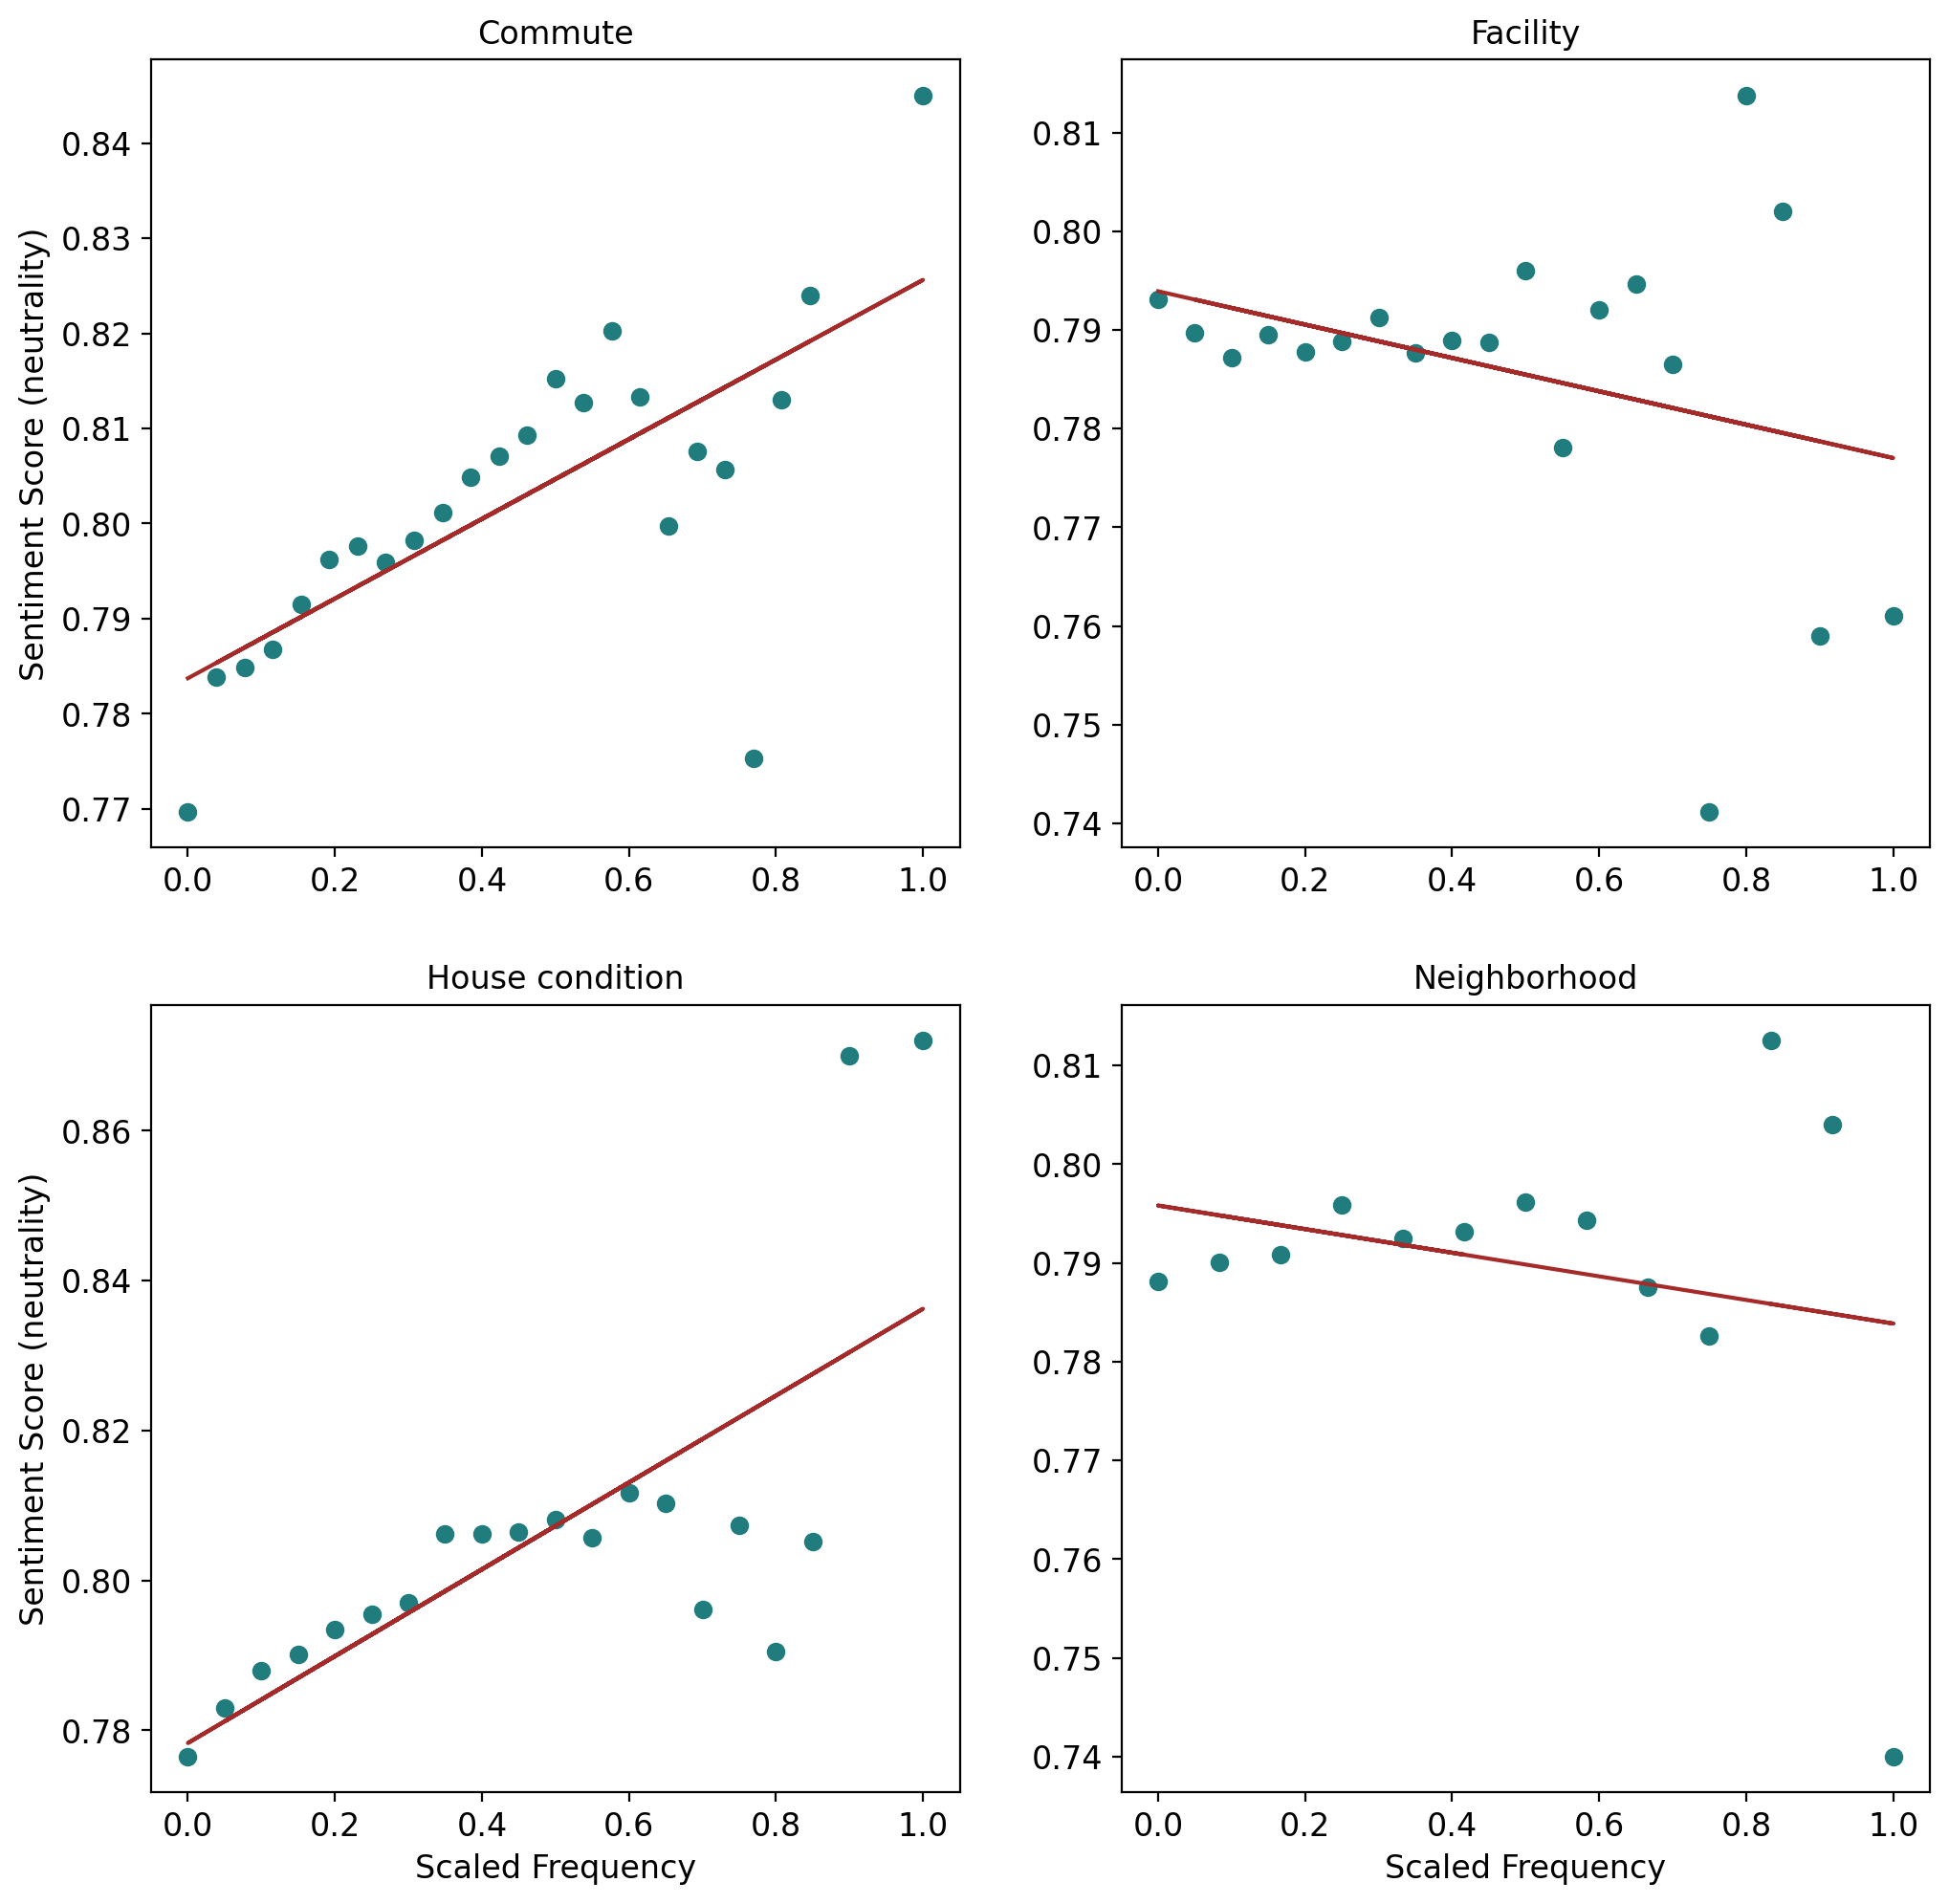

In [30]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=elm)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c='brown')
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (neutrality)',size=12)
plt.savefig('neu.jpg')